## Deep learning ,how to reduce overfitting 

1) what is overfitting :    

- Overfitting refers to a model that has learned the training dataset too well, including the statistical noise or random fluctuations in the training dataset.

A plot of learning curves shows overfitting if:

- The plot of training loss continues to decrease with experience.
- The plot of validation loss decreases to a point and begins increasing again.

- Quand la courbe d'accuracy en fonction des epochs du training passe au dessus de la courbe d accuracy de validation ,
que le model deep learning cnn commence à être en sur-apprentissage, et ou bien de façon symétrique quand la courbe des training loss passe en dessous de la courbe de validation loss.

ways to reduce overfitting
- with mode training data : data augmentation  
- Reduce the network’s capacity by removing layers or reducing the number of elements in the hidden layers
- Apply regularization, which comes down to adding a cost to the loss function for large weights
- Use Dropout layers, which will randomly remove certain features by setting them to zero

2) here we will try to reduce overfitting, by adding Dropout layers



In [3]:
# first neural network with keras 
import os
path = 'D:/ecomdata/projMarket/testdeep'
os.chdir(path)
print(os.getcwd())

import keras
from numpy import loadtxt
from keras.layers import Dense, Dropout
from keras.models import Sequential,Input,Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Secind keras model for classification
import numpy as np
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import fashion_mnist


D:\ecomdata\projMarket\testdeep


#### create keras model with and without Dropout layers
- first case with diabetes dataset
- second case with a classifier

In [16]:

# define the keras model        
def create_model_diabetes(train_X, train_y, valid_X, valid_y, with_dropout_layer=False):
    """ create model with or without dropout layer 
    """
    # dropout in hidden layers with weight constraint
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    if with_dropout_layer:
        model.add(Dropout(0.2))
    
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the keras model
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    
    # fit the keras model on the dataset
    epochs=150
    batch_size = 64
    
    model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(valid_X, valid_y))
    return model_train, model

def create_model_fashion(train_X, train_label, valid_X, valid_label, with_dropout_layer=False):
    """ create model with or without dropout layer 
    """
    batch_size = 64
    epochs = 20
    num_classes = 10

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same'))
    if with_dropout_layer:
        model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    if with_dropout_layer:
        model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    model.summary()
    model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(valid_X, valid_label))
    return model_train, model


#### Display curves, training and validation accuracy, training and validation loss


In [17]:
def display_accuracyandloss(model, pretitle=""):
    """ to check overfitting case at validation step """    
    accuracy = model.history.history['acc']
    val_accuracy = model.history.history['val_acc']
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title(pretitle+' -Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(pretitle+' -Training and validation loss')
    plt.legend()
    plt.show()


#### Prepare datasets

In [18]:
# load the dataset diabetes
print('- Prepare first dataset')
dataset = loadtxt('./pima-indians-diabetes.data.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

train_XA,valid_XA,train_labelA,valid_labelA = train_test_split(X, y, test_size=0.4, random_state=13)
print(train_XA.shape,valid_XA.shape,train_labelA.shape,valid_labelA.shape)
print('- dataset A:diabetes, prepared')

print()
print('- Prepare second dataset')

#### Prepare data for classifier model    
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
classes = np.unique(train_Y)
nClasses = len(classes)
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

train_XB,valid_XB,train_labelB,valid_labelB = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_XB.shape,valid_XB.shape,train_labelB.shape,valid_labelB.shape)
print('- dataset B:fashionmodel, prepared')

- Prepare first dataset
(460, 8) (308, 8) (460,) (308,)
- dataset A:diabetes, prepared

- Prepare second dataset
(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)
- dataset B:fashionmodel, prepared


#### train differents models withour and with Dropout layers

In [19]:
_, model1A = create_model_diabetes(train_XA, train_labelA, valid_XA, valid_labelA)
_, model2A = create_model_diabetes(train_XA, train_labelA, valid_XA, valid_labelA, with_dropout_layer=True)
_, model1B = create_model_fashion(train_XB, train_labelB, valid_XB, valid_labelB)
_, model2B = create_model_fashion(train_XB, train_labelB, valid_XB, valid_labelB, with_dropout_layer=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
__________

#### Case model Diabetes: Overfitting reduction by adding Droput layers 

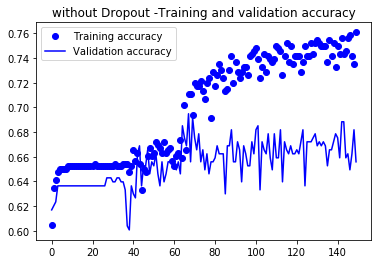

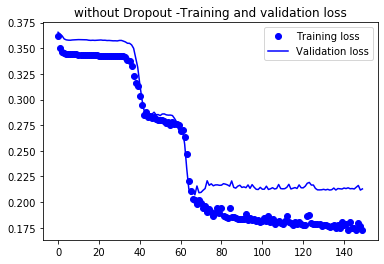

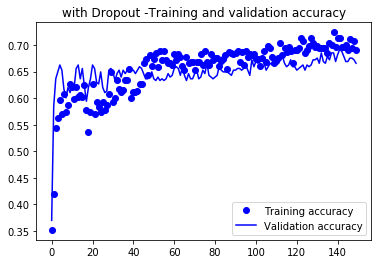

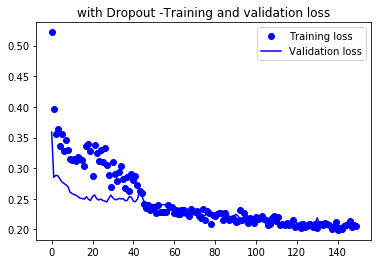

In [20]:
display_accuracyandloss(model1A, 'without Dropout')    
display_accuracyandloss(model2A, 'with Dropout')    


#### Case model fashion: Overfitting reduction by adding Droput layers 

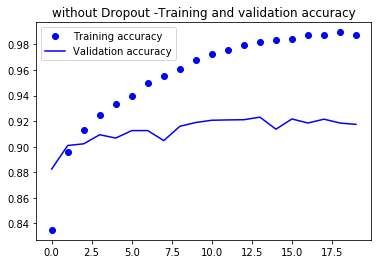

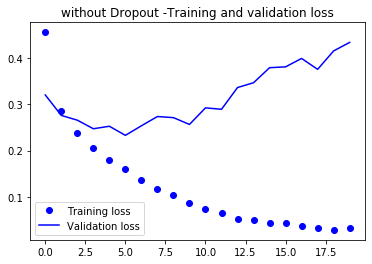

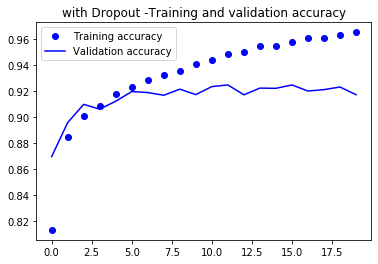

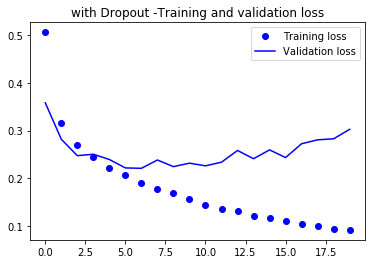

In [21]:
display_accuracyandloss(model1B, 'without Dropout')    
display_accuracyandloss(model2B, 'with Dropout')    


#### Discussion:
    Adding Dropout layers is a powerful way to reduce overfitting